# **Table of Contents**
* [Exploration & Wrangling](#section_a)
    <br><br>
* [Model Building](#section_b)
    * [LOR](#section_21)
    * [Neural Network](#section_2)
    <br><br>
* [Model Selection](#section_c)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from  sklearn           import  metrics
from  keras.datasets    import  mnist

<a id='section_a'></a>
# **Part I - Exploration & Wrangling**

In [3]:
( xtrain , ytrain )  ,  ( xtest , ytest )   =  mnist.load_data()

In [4]:
xtrain.shape  ,  xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
df = pd.DataFrame (ytrain)                      # contains the multi-class labels

df.head()

,0
0,5
1,0
2,4
3,1
4,9


In [6]:
df[0].value_counts()                            # target column elements

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [7]:
# xtrain [ 0 , : , : ]                                                # data of 1st pic

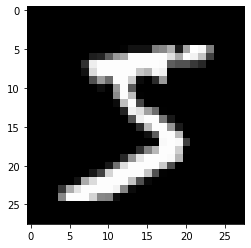

In [8]:
plt.imshow  ( xtrain [0,:,:] , cmap='gray' )  ;                       # image of 1st pic           

* Converting from 3D to 2D

In [9]:
xtrain  =  xtrain.reshape (60000,784) . astype('float32')
xtest   =  xtest.reshape  (10000,784) . astype('float32')

* Max-Scaling

In [10]:
xtrain = xtrain / 255      
xtest  = xtest  / 255

<a id='section_b'></a>
# **Part II - Model Building**

In [11]:
from  sklearn.linear_model    import  LogisticRegression
from  sklearn.neural_network  import  MLPClassifier

<a id='section_21'></a>
## 2.1 - **LOR**

In [12]:
lor  =  LogisticRegression()

lor.fit (xtrain , ytrain)

pred_lor  =  lor.predict (xtest)

<a id='section_2'></a>
## 2.2 - **Neural Network**

In [13]:
nn  =  MLPClassifier ( hidden_layer_sizes=(50,80,60) )       # 3 hidden layers

nn.fit (xtrain , ytrain)

pred_nn  =  nn.predict (xtest)

<a id='section_c'></a>
# **Part III - Model Selection**

## 3.1 - **LOR**

In [16]:
print ( metrics.f1_score              ( ytest , pred_lor , average='micro' ) )
print ( metrics.classification_report ( ytest , pred_lor                   ) )

0.9256
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.94      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



## 3.2 - **Neural Network**

In [17]:
print ( metrics.f1_score              ( ytest , pred_nn , average='micro' ) )
print ( metrics.classification_report ( ytest , pred_nn                   ) )

0.9762000000000001
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [19]:
print  ( pd .value_counts ( ytest )   )  

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64


In [20]:
print  ( pd .value_counts ( pred_nn )   )  

1    1140
2    1033
3    1031
7    1023
9    1004
0     987
4     985
8     959
6     958
5     880
dtype: int64
